In [ ]:









# %%
"""
Refer to graphs and results above for Task 1.

AGE vs CTM: The training R-squared is 0.324 which means that our model was only able to correctly predict only 32.4% of the Cases handled this month whilst the testing R-sqaured was 0.407.

LVL_to_num Vs CTM: The training R-squared is 0.475 which means that our model was only able to correctly predict only 47.5% of the Cases handled this month whilst the testing R-sqaured was 0.419.

SDY Vs CTM: The training R-squared is 0.2873 which means that our model was only able to correctly predict only 28.73% of the Cases handled this month whilst the testing R-sqaured was 0.2027.

CLM Vs CTM: The training R-squared is 0.8935 which means that our model was only able to correctly predict only 89.35% of the Cases handled this month whilst the testing R-sqaured was 0.7771.
"""

# %% [markdown]
# # TASK 2: Multiple Variable Regression

# %%
#SECOND ANSWER THROUGH CORRELATION
fig, ax = plt.subplots(figsize=(15, 8))
X = df2.drop(columns=["LVL"])
corr_matrix = X.corr()
sn.heatmap(corr_matrix, annot=True)
plt.savefig('correlation.jpg')
plt.show()

# %%
"""
1. CLM and CTM are strongly positively correlated with each other, which implies that a 1 unit change in CLM results in a 0.94 change in CTM.
2. Age and Level of seniority in the company are strongly positively correlated, a 1 unit change in age results in a 0.83 change in level of seniority in the law firm.
3. Age of lawyers and number of sick days taken by lawyers in the previous year have a weak  positive correlation implying that a 1 unit change in age taken results in a 11% change in the number of sick days taken.
4. The number of sick days taken by a lawyer and their level of seniority in the firm have a weak postive correlation implying that a 1 unit change in sick days taken results in a 21% change in level of seniority in the firm.
"""

# %%
# Define the target variable and the features
y = df2['CTM']
X = df2[['AGE', 'CLM', 'LVL_to_num', 'SDY']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %%
#plot scatter function
def plot_scatter(y_pred, y_test,x_label, y_label, fit_bool,title):
    plt.scatter(y_pred, y_test, c='crimson')
    if fit_bool:
        p1 = max(max(y_pred), max(y_test))
        p2 = min(min(y_pred), min(y_test))
        plt.plot([p1, p2], [p1, p2], 'b-')
    else:
        plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.title(title)

# %%
def plot_errors(x_train, y_train, train_pred, test_pred):
    """
    For plotting the errors
    """
    train_residuals = y_train - train_pred
    test_residuals = y_test - test_pred
    plt.title(f"The accuracy of training set: {r2_score(y_train, train_pred)}")
    plt.subplot(1,2,1)
    plot_scatter(test_pred,test_residuals,"TEST PREDICTED VALUES", "RESIDUAL ERROR", False, "Error Graph on Test Data")
    plt.subplot(1,2,2)
    plot_scatter(train_pred, train_residuals, "TRAIN SET PREDICTIONS", "RESIDUAL ERROR", False, "Error Graph on Training Data")
    plt.subplots_adjust(left = -0.5)
    plt.show()

# %%
def model_fit_with_diff_inde_variables(X_train, y_train, x_test, model):
    """
    Function helps you choose the best combinations of your independant variables that results in the least error
    """
    x_combination = None
    best_model = None
    best_error = float('inf')
    test_pred, train_pred = None, None
    
    for i in range(1, len(X_train.columns) + 1):
        for combination in itertools.combinations(X_train.columns, i):
            X_combination = X_train[list(combination)]
            x_combination = X_combination
            model.fit(X_combination, y_train)
            train_pred = model.predict(X_combination)
            train_pred.reshape(-1, 1)
            r2 = r2_score(y_train, train_pred)
            print('R-squared value: ',r2)
            print('Combination of X variables: ', combination, '\n')
            
    test_pred = model.predict(x_test)      

    return best_model, x_combination.columns.values, test_pred, train_pred

# %%
# FItting LinearRegression
LR_model, LR_independant_variables, LR_test_pred, LR_train_pred = model_fit_with_diff_inde_variables(X_train, y_train, X_test, LinearRegression())

# %%
# Plotting the Error Graphs for Linear Regression
plot_errors(X_train, y_train, LR_train_pred, LR_test_pred);

# %%
"""
The highest R-sqaured value of the linear regression model is obtained whenever the number of cases handled last month is amongst the independent variables.
"""

# %%
# Fitting Decision Tree Regression
DT_model, DT_independant_variables, DT_test_pred, DT_train_pred = model_fit_with_diff_inde_variables(X_train, y_train, X_test, DecisionTreeRegressor())

# %%
# Plotting the Error Graphs for Decision Tree
plot_errors(X_train, y_train, DT_train_pred, DT_test_pred)

# %%
"""
The decision tree was able to correctly predict 0.9958 of the number of cases handled this month using minimal number of variables being age and level seniority. This was with the variables AGE and number of sick days taken last year.
It reached 100% when all variables were utilized, however utilizing the least number of variables to predict the most number of cases handled this month, this could be that the correlation between Age and number of sick days the lawyers took in the last year, is low.
"""

# %% [markdown]
# # TASK 3: Does each fitted model improve on the previous one and why did we choose it?

# %%
"""
The linear model trained in question 1 performed horribly as it was only able to correctly predict 32.4% of our dependant variable. This model's implementation on this question improved as we combined different independant variables. Its predicition went as high as 89% with Age and CLM combined. However, the decision tree regression model performed the best with the R squared value of 1.
The more we added more independent variables, the more the error went down and the model was able to predict 100% of the dependant features correctly.
"""

# %% [markdown]
# # TASK 4: Does our choice of model make sense?

# %%
"""
Our choice model is the Linear Regression because the errors plotted from the train data and test data depicted a similar pattern as opposed to that of the decision tree. Yes it does since it was chosen based on the best combination of the independent variables, as well as how quick it learnt from its train data.

"""

# %% [markdown]
# # TASK 5: Heuristics  appropriate to support the models: Scatter plots and BIC

# %%
import copy
#looping throught combination of attributes
lin_reg = LinearRegression()
df2.drop(columns=["LVL"], inplace=True)
def split_data(cols):
    ls = []
    for attr in cols:
        if attr not in ls:
            ls.append(attr)
    print("ls: ", ls)        
    X = df2[ls]
    return X

# %%
def column_selection():
    two_d_arr = []
    arr = ['AGE', 'CLM', 'LVL_to_num', 'SDY']
    k = len(arr)
    X = df2.drop(columns=["CTM"])
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    display(x_train.head())
    lin_reg.fit(x_train, y_train)
    y_train_pred = lin_reg.predict(x_train)
    n = len(y_train)
    k = model.coef_.shape[0] + 1 
    bic = n * np.log(mean_squared_error(y_train, y_train_pred)) + k * np.log(n)
    display(Markdown((f"Bayesian criterion Value(BIC): {bic}")))
    display(Markdown((f"The accuracy of training set: {r2_score(y_train, y_train_pred)}")))
    
    for i in range(len(arr)+1):
        if k == len(arr):
             k=-1
        else:
            x = arr.pop(k)
            print('small x: ', x)
            X = split_data(arr)
            x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
            display(x_train.head())
            lin_reg.fit(x_train, y_train)
            y_pred = lin_reg.predict(x_test)
            train_pred = lin_reg.predict(x_train)
            train_residual = y_train - train_pred
            residual = y_test - y_pred
            display(Markdown((f"The accuracy of training set: {r2_score(y_train, train_pred)}")))
            n = len(y_train)
            k = model.coef_.shape[0] + 1 
            bic = n * np.log(mean_squared_error(y_train, train_pred)) + k * np.log(n)
            display(Markdown((f"Bayesian criterion Value(BIC): {bic}")))
            #display(Markdown((f"The accuracy of the model trained with the above attribute is: {r2_score(y_test, y_pred)}")))
            plt.subplot(1,2,1)
            plot_scatter(y_pred,residual,"TEST PREDICTED VALUES","RESIDUAL ERROR", False, "ERROR GRAPH")
            plt.subplot(1,2,2)
            plot_scatter(train_pred, train_residual,"TRAIN PREDICTED VALUES","RESIDUAL ERROR", False, "ERROR GRAPH")
            plt.subplots_adjust(left = -0.5)
            plt.show()
            for b in range(len(arr)):
                element = arr.pop(b)
                if arr not in two_d_arr:
                    two_d_arr.append(copy.deepcopy(arr))
                arr.insert(b,element)
    
            arr.append(x)
            k-=1
    display(Markdown("Two pair combinatorial"))
    for element in two_d_arr:
        
        X = split_data(element)
        x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
        display(x_train.head())
        lin_reg.fit(x_train, y_train)
        y_pred = lin_reg.predict(x_test)
        train_pred = lin_reg.predict(x_train)
        train_residual = y_train-train_pred
        residuals = y_test-y_pred
        display(Markdown((f"The accuracy of training set: {r2_score(y_train, train_pred)}")))
        n = len(y_train)
        k = model.coef_.shape[0] + 1 
        bic = n * np.log(mean_squared_error(y_train, train_pred)) + k * np.log(n)
        display(Markdown((f"Bayesian criterion Value(BIC): {bic}")))
        #display(Markdown((f"The accuracy of the model trained with the above attribute is: {r2_score(y_test, y_pred)}")))
        plt.subplot(1,2,1)
        plot_scatter(y_pred,residual,"TEST PREDICTED VALUES", "RESIDUAL ERROR", False, "Error Graph")
        plt.subplot(1,2,2)
        plot_scatter(train_pred, train_residual, "TRAIN SET PREDICTIONS", "RESIDUAL ERROR", False, "ERROR GRAPH")
        plt.subplots_adjust(left = -0.5)
        plt.show()

# %%
column_selection()

# %%
"""
FIRST ANSWER THROUGH BIC:

Answer to the question, The chosen models makes sense as comfirmed by Bayesian Information Criterion. The above cell
shows BIC for all the possible combination of variables, We focus on all possible combination of 3 attributes, all possible
combination of 2 varibales and a combination of all varibles. The model that gives us a Low BIC is the best performing 
each segment. There is only 1 possible 4 by 4 combination of variables as the total number of variables/attributes is 4,
The model is the overall best performing model with the BIC of 96.4 . Going to the best model in segment of a combination
of 3 variables, The best performing model involves the combination of varibles: AGE, CLM, SDY, hence another comfirmation of
the best 3 by 3 model we chose. In the last segment of 2 by 2 combination of variables the best performing model involves 
the combination variables: CLM, SDY, these variables exhibit the lowest BIC.
"""

# %%
#SECOND ANSWER THROUGH CORRELATION
fig, ax = plt.subplots(figsize=(15, 8))
#X = df2.drop(columns=["LVL"])
corr_matrix = X.corr()
sn.heatmap(corr_matrix, annot=True)
plt.savefig('correlation.jpg')
plt.show()

# %%
#INTERPRETATION USING CORRELATION.
"""
we started the processs by examining the relationship between the attributes and the CTM column, We believe the trhough,
we can determine the predictive power each attributes has on our target("CTM"), From the correlation matrix we can see that
CLM as the strongest predictive power on CTM, hence its the best single variable regression model. The second in the line 
with the best predictive power is AGE, the third best variabl in terms of predictive power is SDY. So for the best
two variables combination model, you would assume we choose CLM and AGE as they are the best? Not quite, we also have
to check the relationship between our predictors, AGE and CLM they are closely correlated as compared to CLM and SDY, 
and SDY and AGE have close predictive power, therefore choosing a variable  that less correlated with CLM makes sense, 
hence the best performing model will with two variable combination is CLM and SDY, note CLM was already guaranteed to be
in best perfoming due to its higher predictive power.

Which combination of 3 variables will exhibit best results. Now we need to add another varible to the two combination model, 
The LVL ordinal variables is not considered, it has the weakest predictive power, therefore the best performing model would
be CLM,AGE and SDY. Below is just a visualtion of th relationships in terms of correlation graphs.
"""

# %%
pd.plotting.scatter_matrix(df2, figsize=(10,10))
plt.show();

# %% [markdown]
# # TASK 6: Feature Engineering to generate better performing models overall.

# %%

"""
The best performing model was when the model had all the avaible varibles. Focusing on the categorical attribute, we 
feature engineered it by utilizing a normal mapping of categorical data to numerical data. We assessed how our different models performed with different combinations of the independednt variables.
Linear regression models do not work with categorical data hence the necessity to convert categorical data to numerical data, that is LVL to LVL_on_num.
"""

one_hot_df=df.copy()
one_hot_df.head()
#converting to one_hot_encoding
one_hot_df = pd.get_dummies(one_hot_df, columns=["LVL"], dtype = int)
one_hot_df.head()

# %%
#training
X = one_hot_df.drop(columns=["ID", "CTM"])
y = one_hot_df["CTM"]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
lin_reg.fit(x_train, y_train)

# %%
predicted = lin_reg.predict(x_train)
hot_score = r2_score(y_train, predicted)
print(r2_score(y_train, predicted))

# %%
print((hot_score - 0.8988587627459381)*100)

# %% [markdown]
# #  TASK 7: Do the models chosen make sense?

# %%
"""
Yes they make sense because the Linear regression performed almost the same on the training data and the test data with regards to errors obtained. We observd the Decision Tree Regression performing exceptionally well during training but failing to translate that performance to the test data, we could conclude that the model was overtrained as the model obtained at most , 100% prediction during training but a very high disparity in errors obtained with training data compared to test data. Our model of choice will be the Linear Regression Model.
"""

# %%
df2.head(21)







"""
PROBLEM STATEMENT: Our goal in this assignment will be to predict the number of cases a lawyer will handle this month given the
number that they handled last month, their age, their level of seniority and the number of sick days taken
in the last year.
"""

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.interpolate import splrep, BSpline
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("lawyers.csv")



In [4]:
df.head()

,ID,AGE,CTM,CLM,LVL,SDY
0,1,54,11,10,Senior Partner,35
1,2,25,1,0,Associate,10
2,3,30,9,8,Associate,87
3,4,26,3,3,Associate,8
4,5,28,3,5,Associate,4


In [5]:
df.shape


(200, 6)

In [6]:
df.info() #result show there are no null values, and one column is categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      200 non-null    int64 
 1   AGE     200 non-null    int64 
 2   CTM     200 non-null    int64 
 3   CLM     200 non-null    int64 
 4   LVL     200 non-null    object
 5   SDY     200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [7]:
df["LVL"].unique()

array(['Senior Partner', 'Associate', 'Senior Associate',
       'Junior Partner', 'Managing Partner'], dtype=object)

In [9]:
# %%
#ways to deal with categorical data, ordinal encoding and one-hot encoding
#what i use, df2 consist LVL as onehot and df consits level as ordinal
df.columns


Index(['ID', 'AGE', 'CTM', 'CLM', 'LVL', 'SDY'], dtype='object')

In [10]:
df2 = df[['AGE', 'CTM', 'CLM', 'LVL', 'SDY']]

In [11]:
df.head(11) #one_hot encoded


,ID,AGE,CTM,CLM,LVL,SDY
0,1,54,11,10,Senior Partner,35
1,2,25,1,0,Associate,10
2,3,30,9,8,Associate,87
3,4,26,3,3,Associate,8
4,5,28,3,5,Associate,4
5,6,39,5,8,Senior Associate,9
6,7,34,4,6,Associate,14
7,8,36,4,4,Associate,6
8,9,39,3,4,Senior Associate,7
9,10,64,12,12,Senior Partner,66


In [13]:
# Converting 'LVL' string entries to numerical
LVL_to_num = {
    'Associate': 1,
    'Senior Associate': 2,
    'Junior Partner': 3,
    'Senior Partner': 4,
    'Managing Partner': 5
}
    

In [14]:



df2['LVL_to_num'] = df2['LVL'].map(LVL_to_num)


df2.head(11)

,AGE,CTM,CLM,LVL,SDY,LVL_to_num
0,54,11,10,Senior Partner,35,4
1,25,1,0,Associate,10,1
2,30,9,8,Associate,87,1
3,26,3,3,Associate,8,1
4,28,3,5,Associate,4,1
5,39,5,8,Senior Associate,9,2
6,34,4,6,Associate,14,1
7,36,4,4,Associate,6,1
8,39,3,4,Senior Associate,7,2
9,64,12,12,Senior Partner,66,4


In [15]:
df["LVL"].unique()

array(['Senior Partner', 'Associate', 'Senior Associate',
       'Junior Partner', 'Managing Partner'], dtype=object)

In [17]:
df2["LVL_to_num"].unique()

array([4, 1, 2, 3, 5], dtype=int64)

In [18]:
#plot scatter function
def plot_scatter(y_pred, y_test,x_label, y_label, fit_bool,title):
    plt.scatter(y_pred, y_test, c='crimson')
    if fit_bool:
        p1 = max(max(y_pred), max(y_test))
        p2 = min(min(y_pred), min(y_test))
        plt.plot([p1, p2], [p1, p2], 'b-')
    else:
        plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.title(title)
    #plt.show()

In [21]:

#returns performance matrix
def performance_metrics(model, x_test, y_test, msg):
    predicted_values = model.predict(x_test)
    print(f"{msg} R^2 value {r2_score(y_test, predicted_values)}")
    #print(f"Mean squared error {mean_squared_error(y_test, predicted_values)}")
    return predicted_values, y_test

In [23]:
#simple linear rigression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
y = df2["CTM"]
def train_simple_lin_reg(interest_attr):
    X = df2[[interest_attr]]
    X.head(5)
    X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    return lin_reg,x_test, y_test, X_train, y_train





Attribute Selected: AGE
Training R^2 value 0.3240311366844518
Testing R^2 value 0.40717371283320725


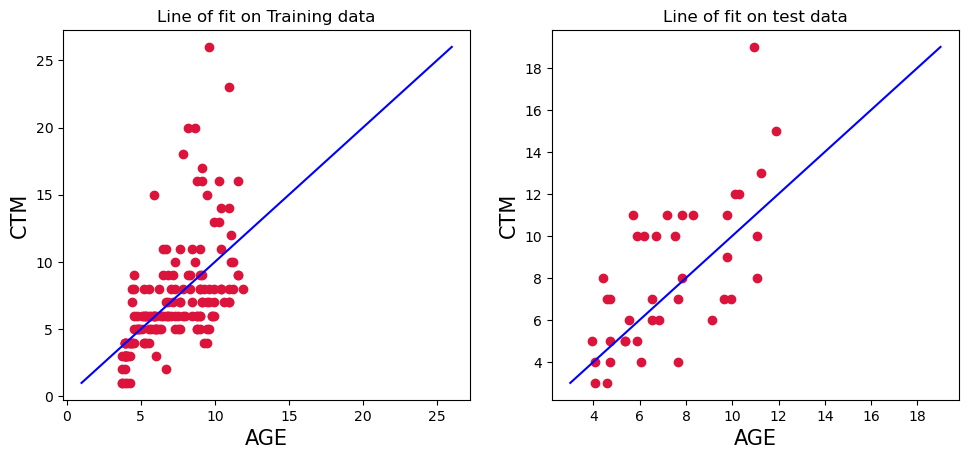

Attribute Selected: LVL_to_num
Training R^2 value 0.4750379086696088
Testing R^2 value 0.41926695694723626


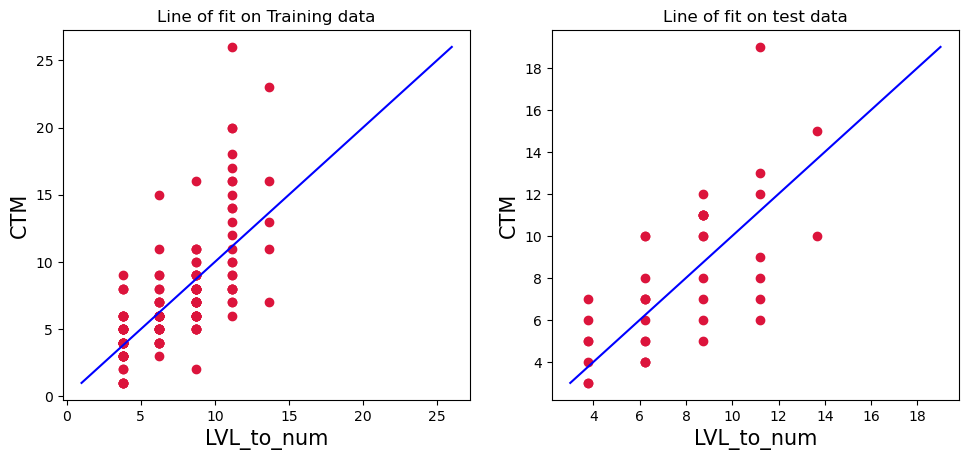

Attribute Selected: SDY
Training R^2 value 0.2873320323075441
Testing R^2 value 0.2026767515384823


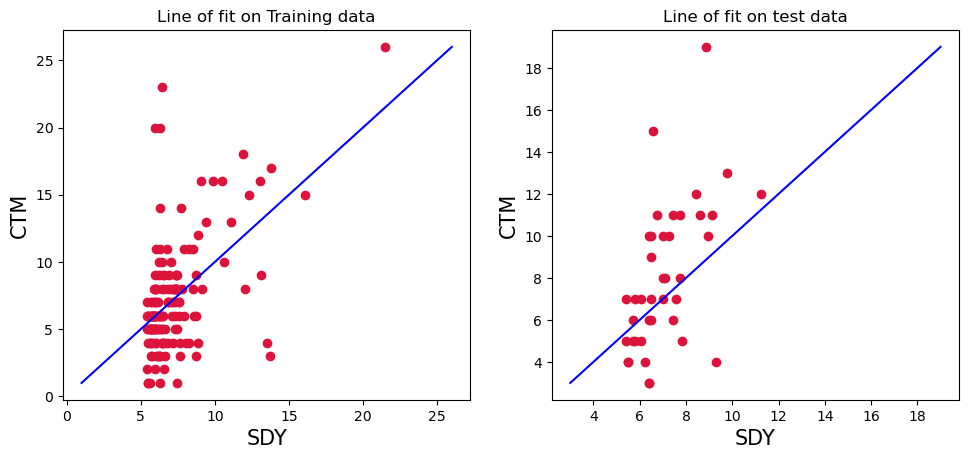

Attribute Selected: CLM
Training R^2 value 0.8934921816913699
Testing R^2 value 0.77715585242434


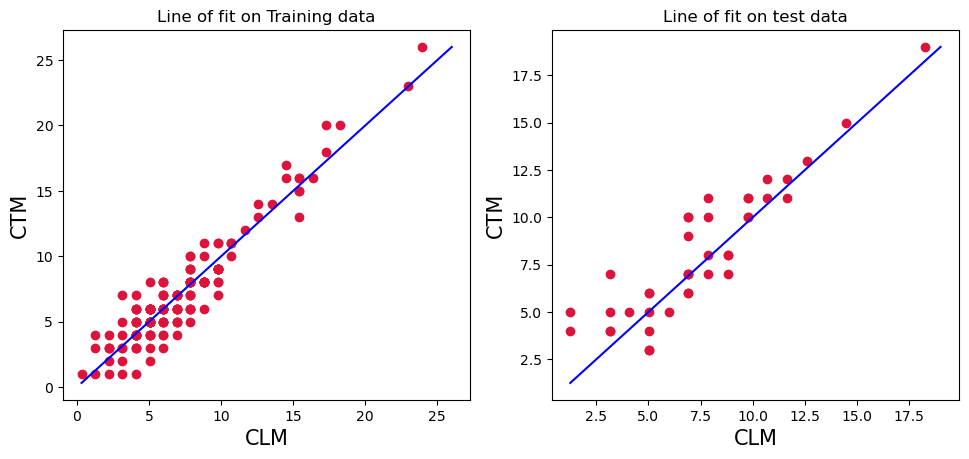

In [24]:
# # TASK1: Predicting CTM from each of the attribute

# %%
#treating each individual attribute as the only predictor for CTM
cols = ["AGE", "LVL_to_num", "SDY", "CLM"]
for col in cols:
    print(f"Attribute Selected: {col}")
    model, x_test, y_test, x_train, y_train = train_simple_lin_reg(col)
    y_pred, y_test2 = performance_metrics(model, x_train, y_train, "Training")
    plt.subplot(1,2,1)
    plot_scatter(y_pred, y_test2, col, "CTM", True, "Line of fit on Training data")
    pred_test, y_test = performance_metrics(model, x_test, y_test, "Testing")
    plt.subplot(1,2,2)
    plot_scatter(pred_test, y_test, col, "CTM", True, "Line of fit on test data")
    #fig.tight_layout(pad=10.0)
    plt.subplots_adjust(left = -0.5)
    plt.show()

AGE vs CTM: The training R-squared is 0.324 which means that our model was only able to correctly predict only 32.4% of the Cases handled this month whilst the testing R-sqaured was 0.407.

LVL_to_num Vs CTM: The training R-squared is 0.475 which means that our model was only able to correctly predict only 47.5% of the Cases handled this month whilst the testing R-sqaured was 0.419.

SDY Vs CTM: The training R-squared is 0.2873 which means that our model was only able to correctly predict only 28.73% of the Cases handled this month whilst the testing R-sqaured was 0.2027.

CLM Vs CTM: The training R-squared is 0.8935 which means that our model was only able to correctly predict only 89.35% of the Cases handled this month whilst the testing R-sqaured was 0.7771.
"""

In [28]:
 # TASK 2: Multiple Variable Regression

In [29]:

# Define the target variable and the features
y = df2['CTM']
X = df2[['AGE', 'CLM', 'LVL_to_num', 'SDY']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
#plot scatter function
def plot_scatter(y_pred, y_test,x_label, y_label, fit_bool,title):
    plt.scatter(y_pred, y_test, c='crimson')
    if fit_bool:
        p1 = max(max(y_pred), max(y_test))
        p2 = min(min(y_pred), min(y_test))
        plt.plot([p1, p2], [p1, p2], 'b-')
    else:
        plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.title(title)

1. CLM and CTM are strongly positively correlated with each other, which implies that a 1 unit change in CLM results in a 0.94 change in CTM.
2. Age and Level of seniority in the company are strongly positively correlated, a 1 unit change in age results in a 0.83 change in level of seniority in the law firm.
3. Age of lawyers and number of sick days taken by lawyers in the previous year have a weak  positive correlation implying that a 1 unit change in age taken results in a 11% change in the number of sick days taken.
4. The number of sick days taken by a lawyer and their level of seniority in the firm have a weak postive correlation implying that a 1 unit change in sick days taken results in a 21% change in level of seniority in the firm.
"""

In [31]:
# Define the target variable and the features
y = df2['CTM']
X = df2[['AGE', 'CLM', 'LVL_to_num', 'SDY']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:


#plot scatter function
def plot_scatter(y_pred, y_test,x_label, y_label, fit_bool,title):
    plt.scatter(y_pred, y_test, c='crimson')
    if fit_bool:
        p1 = max(max(y_pred), max(y_test))
        p2 = min(min(y_pred), min(y_test))
        plt.plot([p1, p2], [p1, p2], 'b-')
    else:
        plt.axhline(y=0, color='r', linestyle='-')
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    plt.title(title)